Project NYC 311 Call Service Request Analysis based on the requirements.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\RAHUL\\Python files")

In [2]:
NYC=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

D:\rahul study\business analytics\Python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
NYC.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [4]:
NYC.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# Setting pandas maximum colummns display so as to view all columns at once.
pd.set_option('display.max_columns', None)

In [6]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

In [7]:
# A list of columns to remove from the dataframe
NYC_cols_rmv = ['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
               'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type',
               'Due Date', 'Resolution Description','Community Board', 'X Coordinate (State Plane)',
               'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name',
               'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address',
               'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint',
               'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
               'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
               'Ferry Direction', 'Ferry Terminal Name', 'Location', 'Address Type', 'Agency Name',
               'Resolution Action Updated Date', 'Descriptor', 'Location Type']

In [8]:
# Remove the columns added to the df_cols_rmv list from df dataframe
NYC.drop(NYC_cols_rmv, inplace=True, axis=1)

In [9]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 11 columns):
Unique Key        364558 non-null int64
Created Date      364558 non-null object
Closed Date       362177 non-null object
Agency            364558 non-null object
Complaint Type    364558 non-null object
Incident Zip      361560 non-null float64
City              361561 non-null object
Status            364558 non-null object
Borough           364558 non-null object
Latitude          360528 non-null float64
Longitude         360528 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 30.6+ MB


In [10]:
#Explore Incident Zip
NYC['Incident Zip'].unique()

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462.,    nan, 11385., 11414.,
       11213., 11375., 11211., 10312., 10017., 11417., 10002., 10027.,
       11209., 10035., 11418., 11421., 11205., 10468., 11355., 11358.,
       11210., 11368., 11427., 11436., 10308., 11364., 10011., 11423.,
       11230., 10003., 11221., 11416., 11378., 11236., 11218., 10029.,
       10028., 11214., 11207., 11369., 11223., 11220., 10302., 11420.,
       11354., 10473., 10301., 11103., 10465., 11377., 11212., 11365.,
       10472., 10452., 11203., 10469., 11237., 11434., 11101., 10460.,
       11229., 11206., 11102., 10466., 10009., 10033., 11694., 10022.,
       10470., 11433., 11428., 11413., 10463., 10471., 10474., 11228.,
       10014., 10475., 11225., 11233., 11370., 11204., 11435., 10459.,
      

In [11]:
# Function that cleans the Incident Zip values and returns nan for data that cannot be cleaned
def correct_zip(zip_code):
    try:
        zip_code = int(float(zip_code))
    except:
        try:
            zip_code = int(float(zip_code.split('-')[0]))
        except:
            return np.nan
    if zip_code < 10000 or zip_code > 19999:
        return np.nan
    else:
        return str(zip_code)

In [12]:
# Apply correct_zip function to clean Incident Zip data
NYC['Incident Zip'] = NYC['Incident Zip'].apply(correct_zip)

In [13]:
#Remove rows from data that have incident zip as null i.e nan
NYC = NYC[NYC['Incident Zip'].notnull()]

In [14]:
# All the unique Complaint type
NYC['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [15]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361450 entries, 0 to 364557
Data columns (total 11 columns):
Unique Key        361450 non-null int64
Created Date      361450 non-null object
Closed Date       361392 non-null object
Agency            361450 non-null object
Complaint Type    361450 non-null object
Incident Zip      361450 non-null object
City              361447 non-null object
Status            361450 non-null object
Borough           361450 non-null object
Latitude          360377 non-null float64
Longitude         360377 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 33.1+ MB


In [16]:
NYC.Borough.unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [17]:
NYC.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'BREEZY POINT', 'QUEENS', nan, 'Astoria',
       'Long Island City', 'Woodside', 'East Elmhurst', 'Howard Beach'],
      dtype=object)

In [18]:
City_comp = NYC.groupby(['Complaint Type','City']).size().unstack()

In [19]:
NYC[['Complaint Type', 'City']].head(10)

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


In [20]:
NYC = NYC[NYC['City'].notnull()]

In [21]:
NYC['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'BREEZY POINT', 'QUEENS', 'Astoria',
       'Long Island City', 'Woodside', 'East Elmhurst', 'Howard Beach'],
      dtype=object)

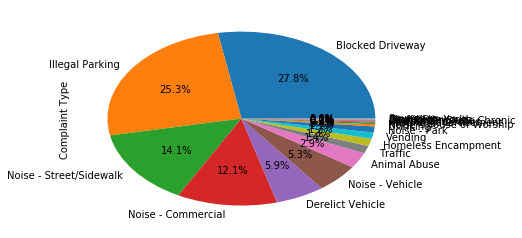

In [64]:
NYC['Complaint Type'].value_counts(10).plot.pie(autopct='%1.1f%%',shadow=False)

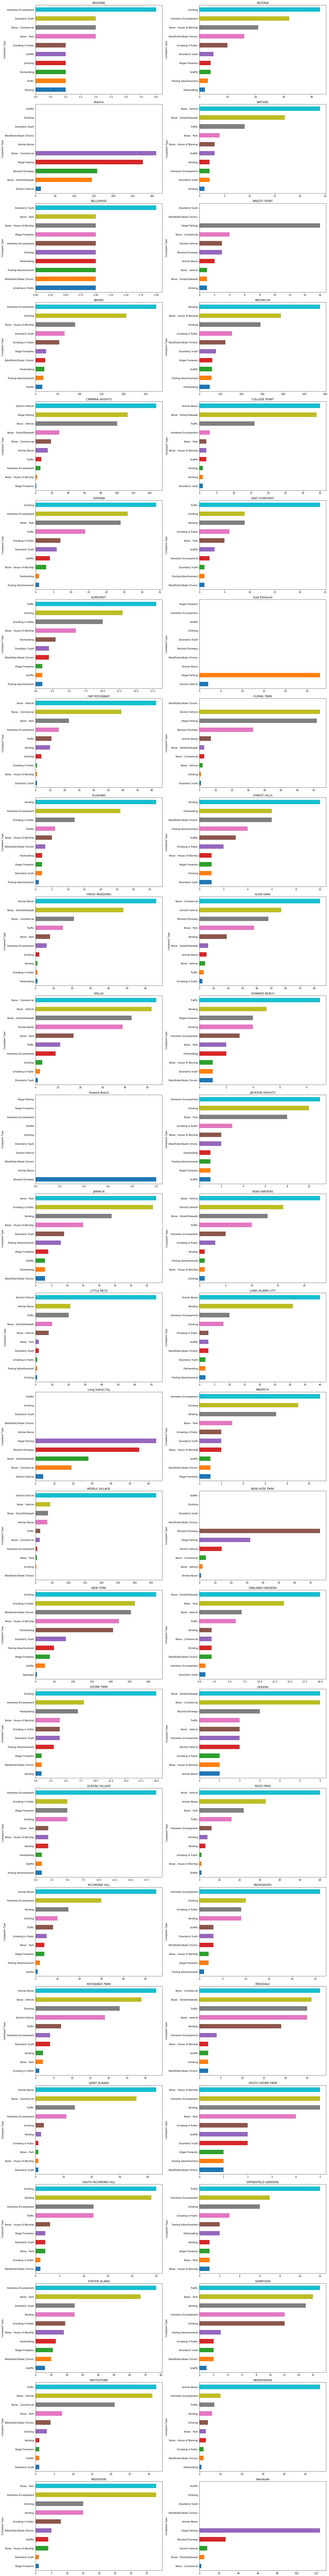

In [24]:
# Visualization of most Complaints per City
City_comp = NYC.groupby(['Complaint Type','City']).size().unstack()

col_number = 2
row_number = 26
fig, axes = plt.subplots(row_number,col_number, figsize=(20,156))

for i, (label,col) in enumerate(City_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

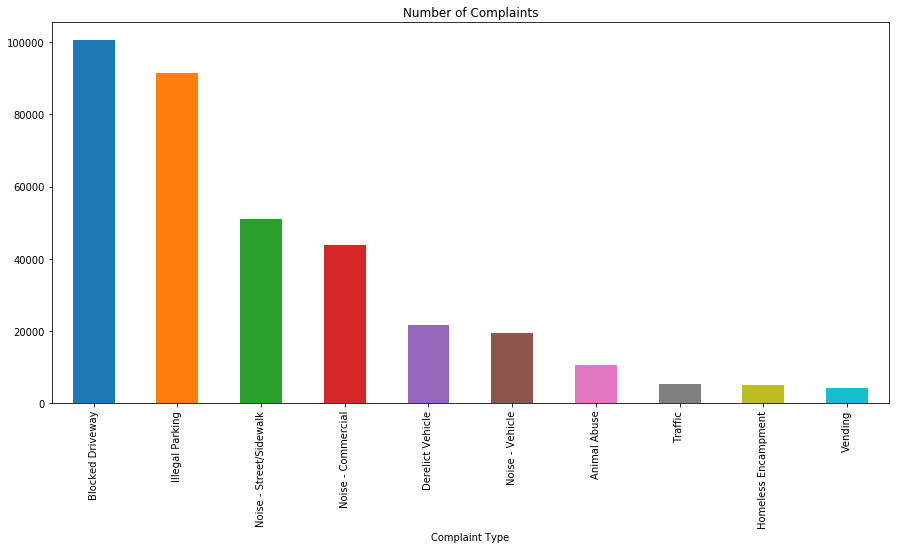

In [25]:
# Visualization of Top 10 Complaints
NYC.groupby('Complaint Type').size().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(15,7),
                                                             title='Number of Complaints');

In [65]:
NYC['Complaint Type'].describe()

count               361447
unique                  21
top       Blocked Driveway
freq                100548
Name: Complaint Type, dtype: object

In [66]:
print("From above analysis we observed that the Blocked Driveway is the major type of Complaint occured 100548 times.")

From above analysis we observed that the Blocked Driveway is the major type of Complaint occured 100548 times.
